In [1]:
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'merged_df' has columns: 'fy', 'revenue', 'tickers'


In [2]:

with open('data/boycott_target/coke/coke_quarterly.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)


['boycotted', 'ticker', 'fy', 'fp', 'end', 'revenue', 'gross_profit', 'net_income', 'operating_expenses', 'r_and_d', 'depr_amort', 'interest_expense', 'interest_income', 'income_before_tax', 'tax_expense', 'eps_basic', 'eps_diluted', 'shares_basic', 'shares_diluted', 'assets', 'assets_current', 'liabilities', 'liabilities_current', 'equity', 'cash', 'accounts_receivable', 'inventory', 'long_term_debt', 'capex', 'operating_cf', 'investing_cf', 'financing_cf', 'employees', 'gross_margin_pct', 'net_margin_pct']
['1', 'COKE', '2020', 'Q2', '2020-06-28', '2400236000.0', '834596000', '54231000', '', '', '42837000.0', '18745000.0', '', '', '20548000', '', '', '', '', '3184580000', '900111000', '2679015000', '634230000', '397418000.0', '77550000', '', '', '', '', '', '', '', '', '0.34771414144275814', '0.022594028253888367']
['1', 'COKE', '2020', 'Q3', '2020-09-27', '1328484000.0', '472438000', '51884000', '', '', '48093000.0', '9033000.0', '', '', '18363000', '', '', '', '', '3312893000', '97

In [3]:
coke_quarterly_df = pd.read_csv("/Users/giuliamariapetrilli/Documents/GitHub/masters_thesis/data/boycott_target/coke/coke_quarterly.csv")
sbux_quarterly_df = pd.read_csv("/Users/giuliamariapetrilli/Documents/GitHub/masters_thesis/data/boycott_target/sbux/sbux_quarterly.csv")
bros_quarterly_df = pd.read_csv("/Users/giuliamariapetrilli/Documents/GitHub/masters_thesis/data/control_group/bros/bros_quarterly.csv")
chipotle_quarterly_df = pd.read_csv("/Users/giuliamariapetrilli/Documents/GitHub/masters_thesis/data/control_group/cmg/cmg_quarterly.csv")




In [4]:

# List of CSV files (replace with your actual file paths)
files = [coke_quarterly_df, sbux_quarterly_df, bros_quarterly_df, chipotle_quarterly_df]
# Read and concatenate all dataframes files into a single DataFrame
merged_df = pd.concat(files, ignore_index=True)
print(merged_df)

    boycotted ticker    fy  fp         end       revenue  gross_profit  \
0           1   COKE  2020  Q2  2020-06-28  2.400236e+09  8.345960e+08   
1           1   COKE  2020  Q3  2020-09-27  1.328484e+09  4.724380e+08   
2           1   COKE  2021  Q1  2021-04-02  1.269857e+09  4.487030e+08   
3           1   COKE  2021  Q2  2021-07-02  2.702943e+09  9.436430e+08   
4           1   COKE  2021  Q3  2021-10-01  1.457432e+09  5.177120e+08   
5           1   COKE  2022  Q1  2022-04-01  1.404358e+09  5.075760e+08   
6           1   COKE  2022  Q2  2022-07-01  1.595215e+09  5.506590e+08   
7           1   COKE  2022  Q3  2022-09-30  1.628589e+09  6.211070e+08   
8           1   COKE  2023  Q1  2023-03-31  1.571642e+09  6.241060e+08   
9           1   COKE  2023  Q2  2023-06-30  1.738832e+09  6.715770e+08   
10          1   COKE  2023  Q3  2023-09-29  1.712428e+09  6.615500e+08   
11          1   COKE  2024  Q1  2024-03-29  1.591626e+09  6.405590e+08   
12          1   COKE  2024  Q2  2024-0

In [5]:

# Optional: sort by fiscal year for linear regression
 
 
merged_df = merged_df.sort_values(by=['ticker', 'fy'])

merged_df.head(10)

# Save merged dataset if needed
merged_df.to_csv("merged_dataset.csv", index=False)


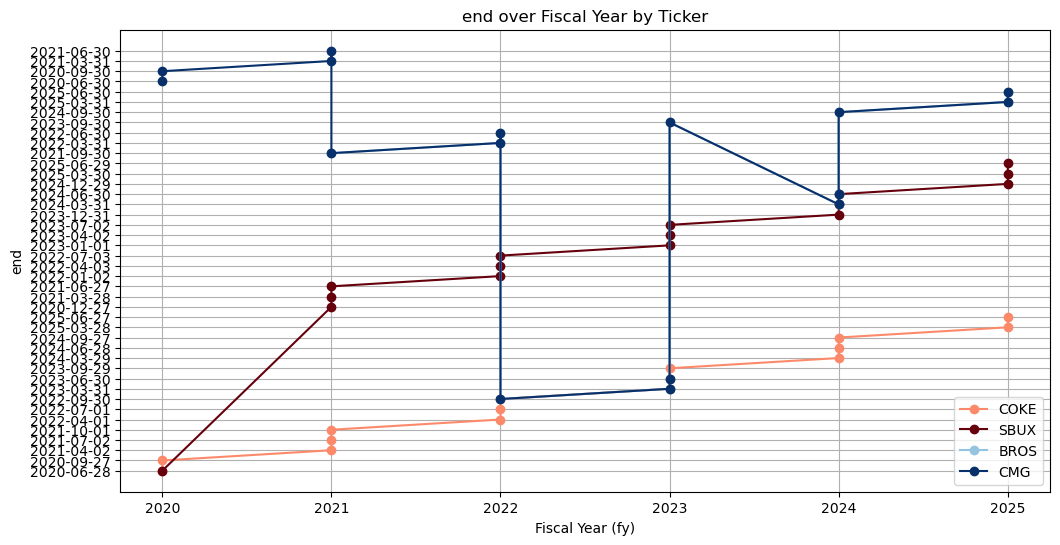

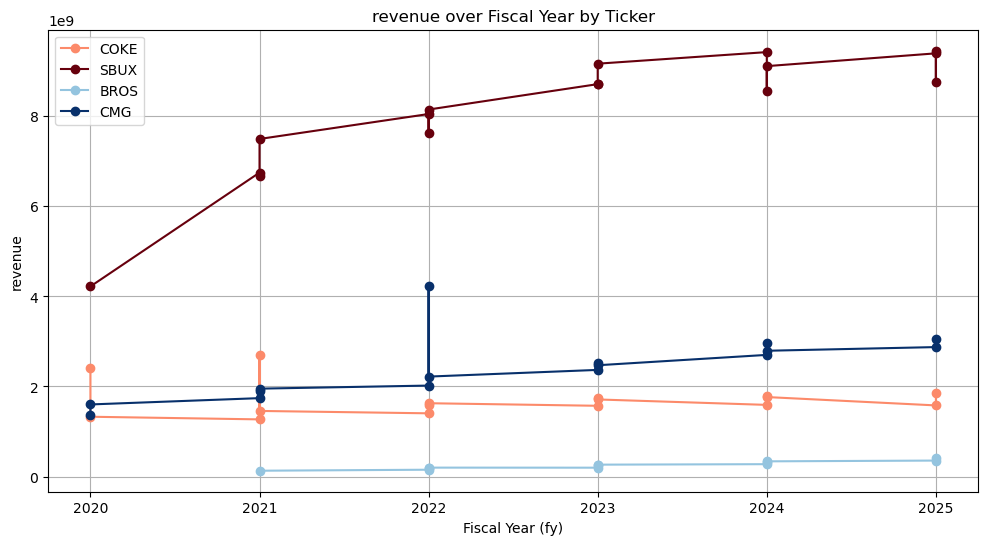

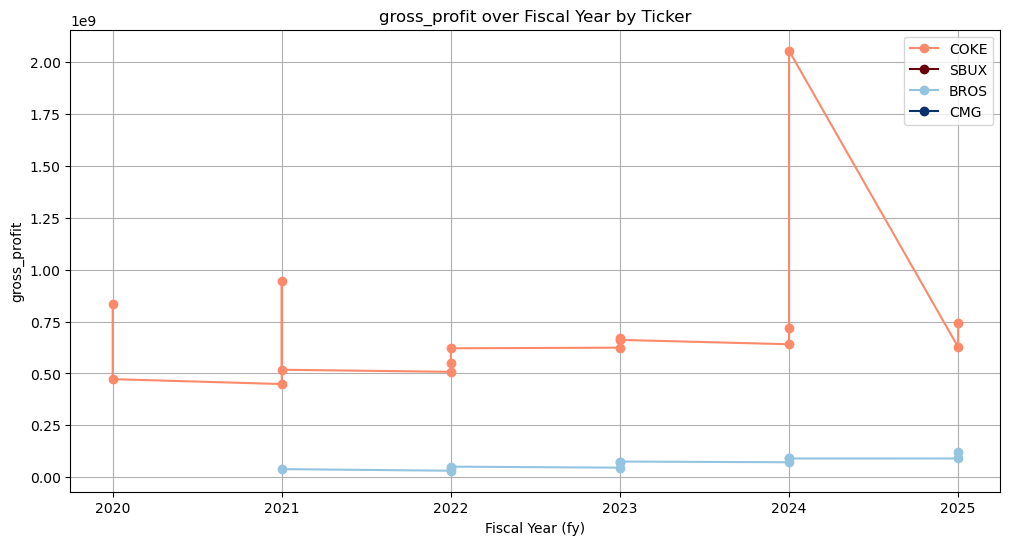

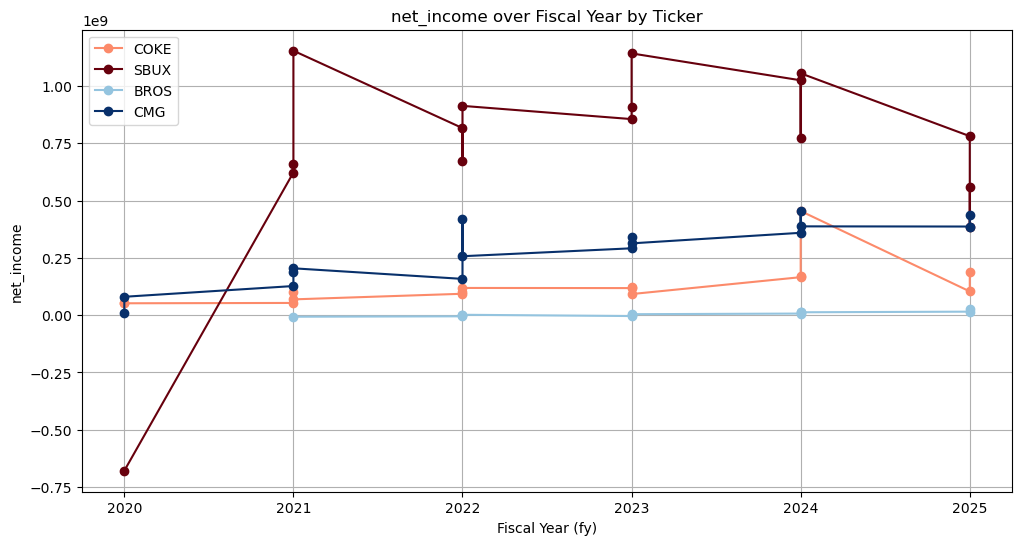

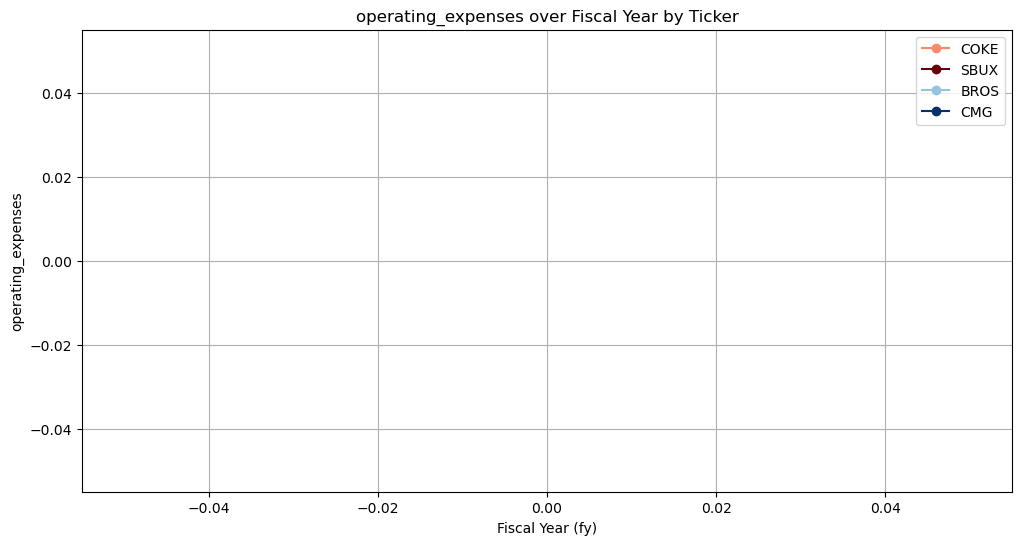

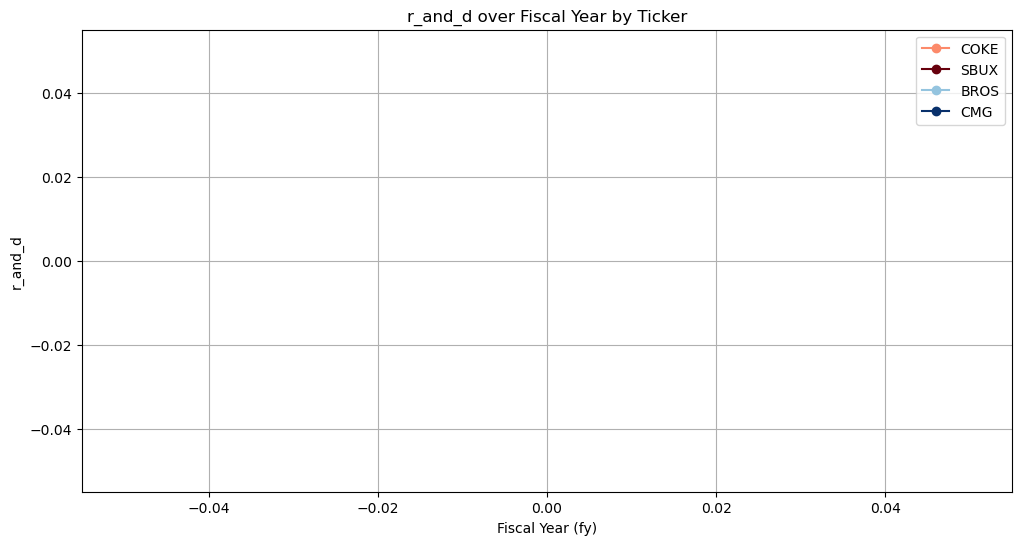

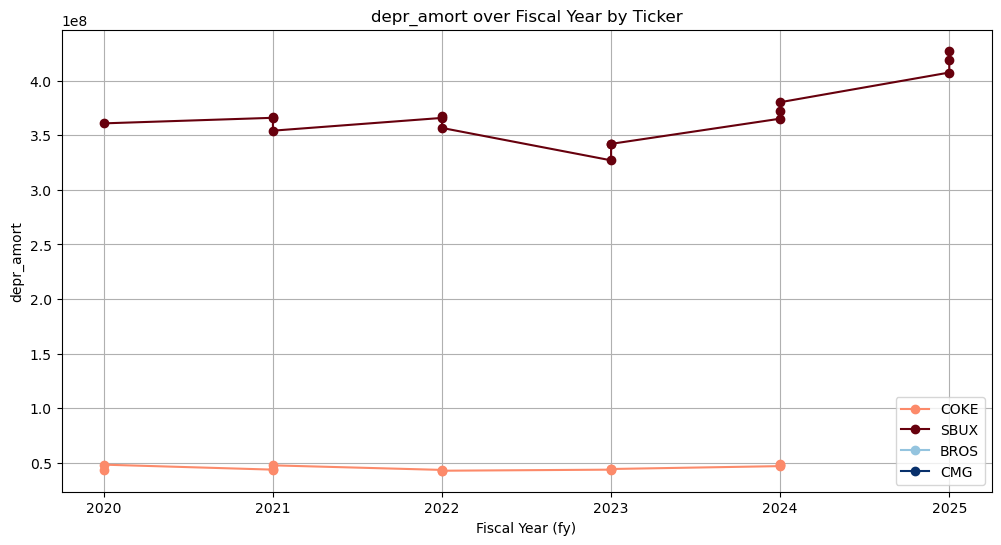

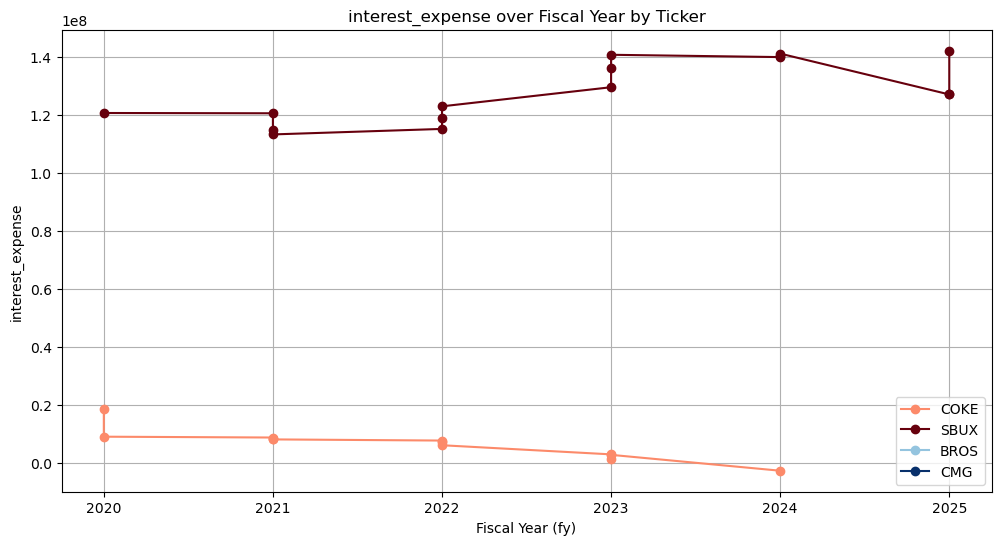

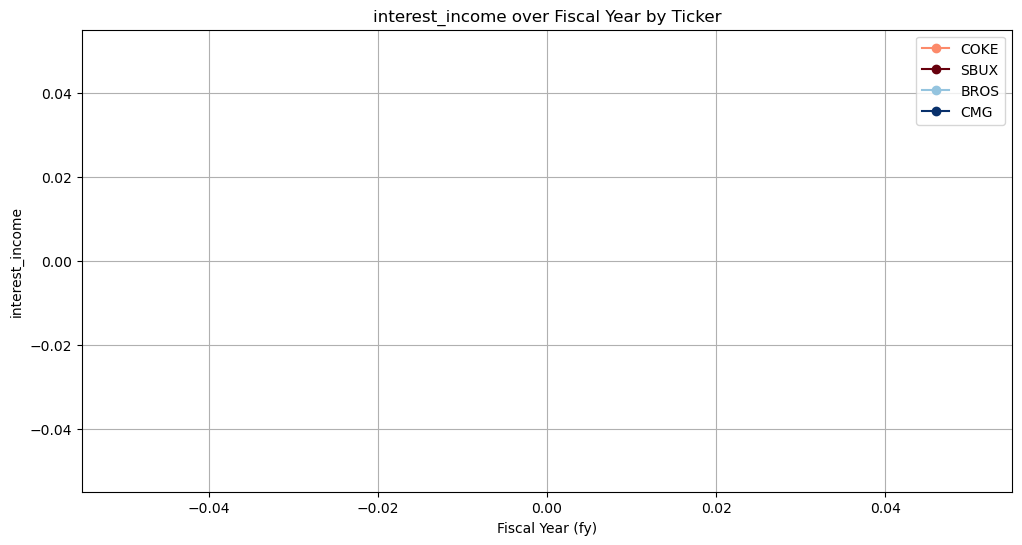

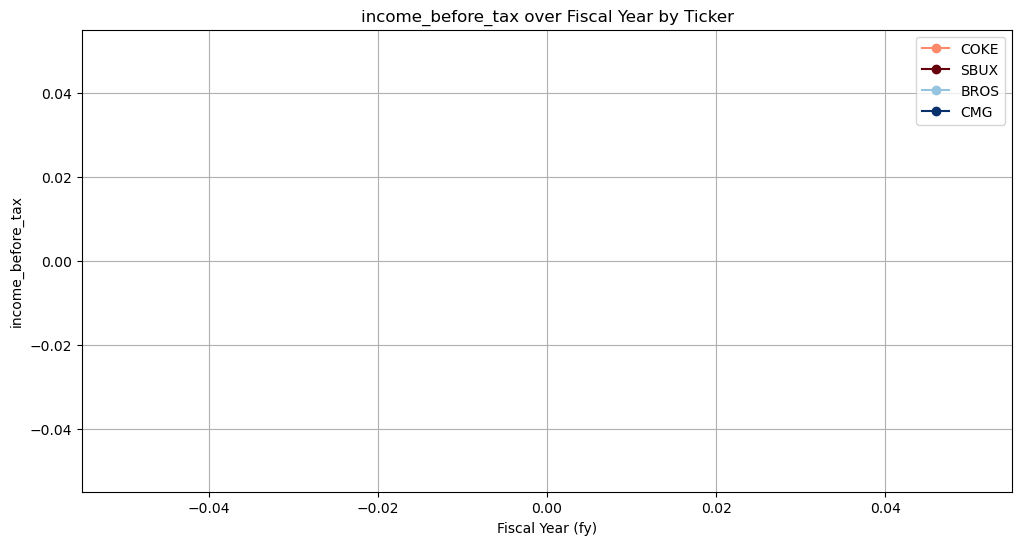

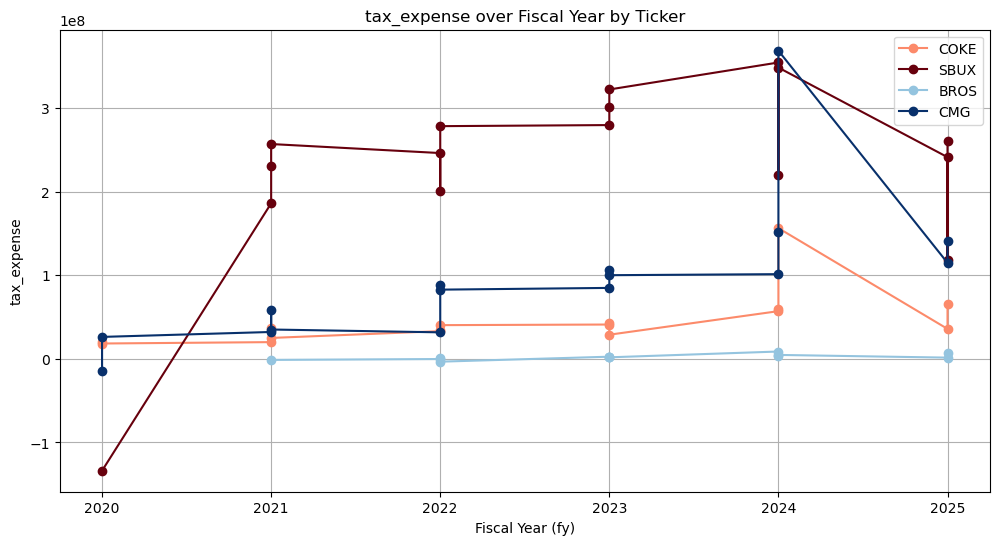

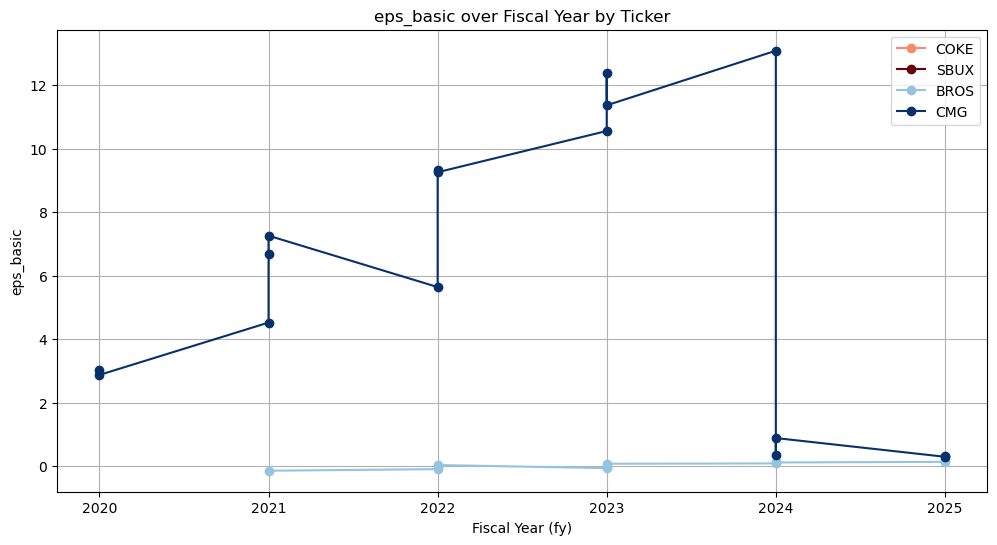

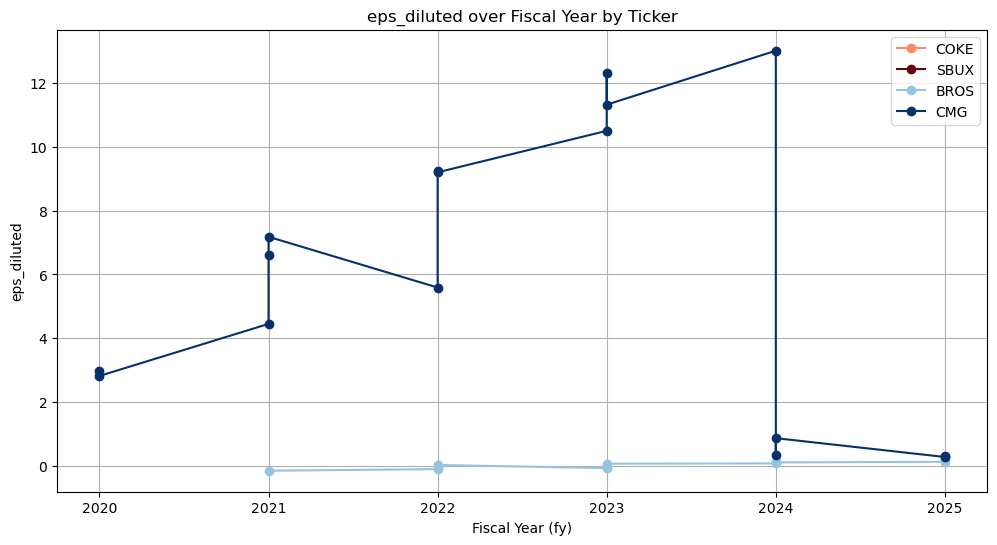

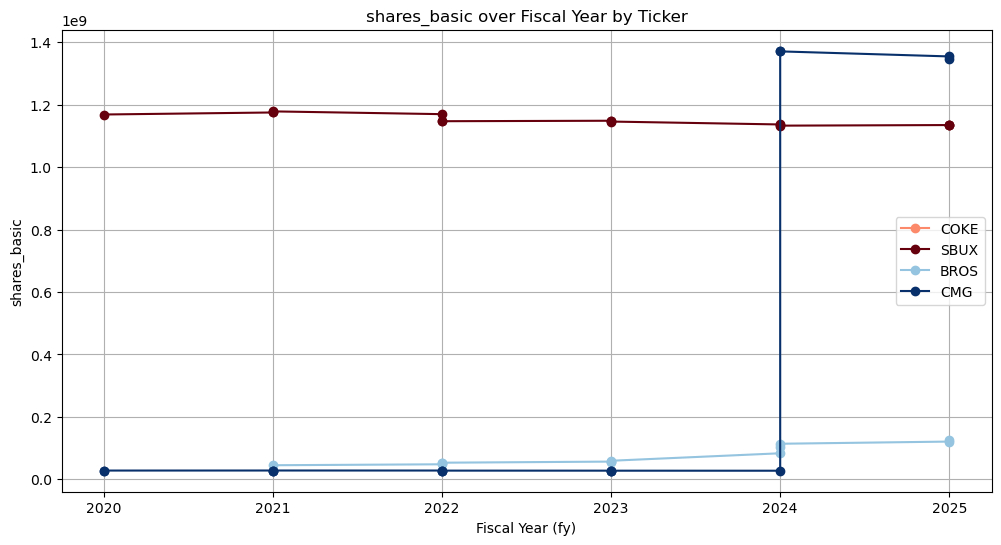

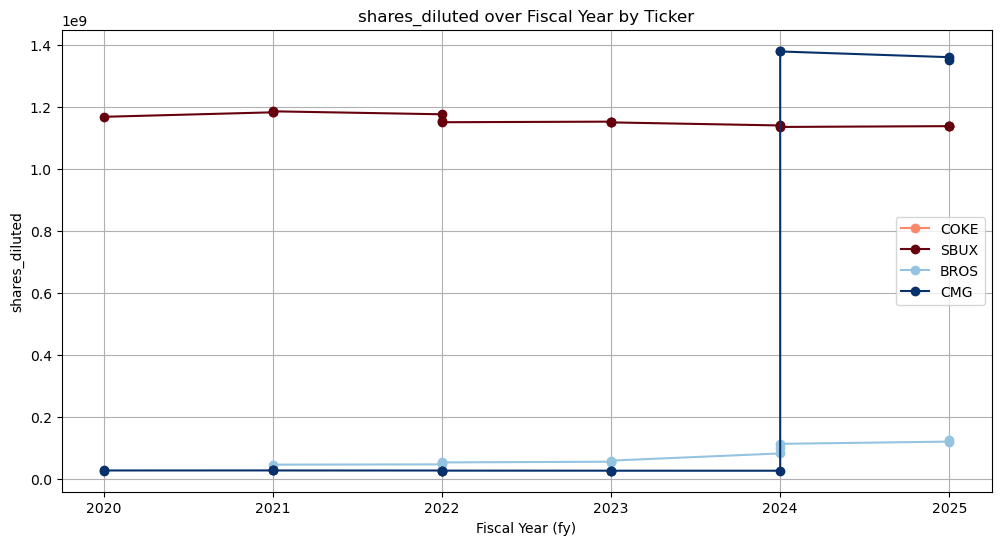

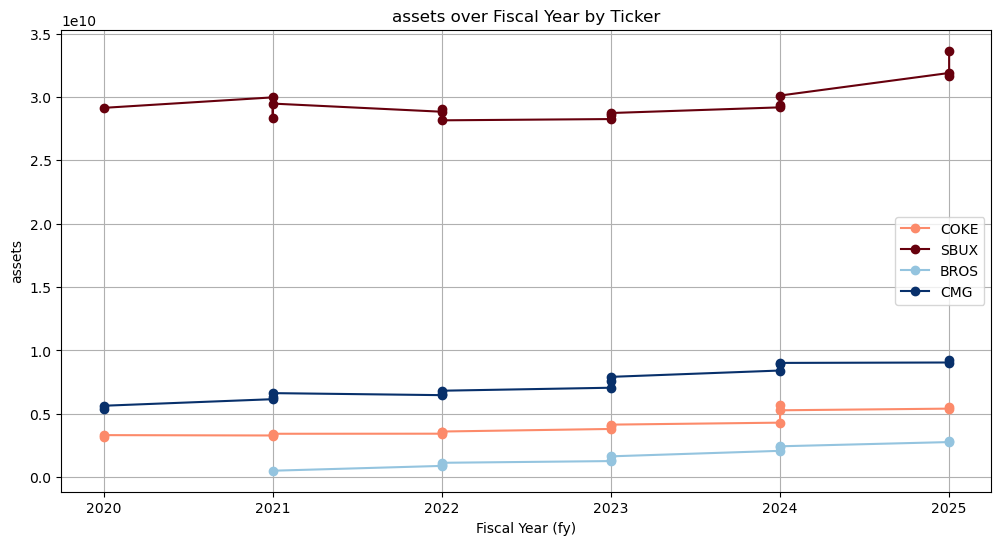

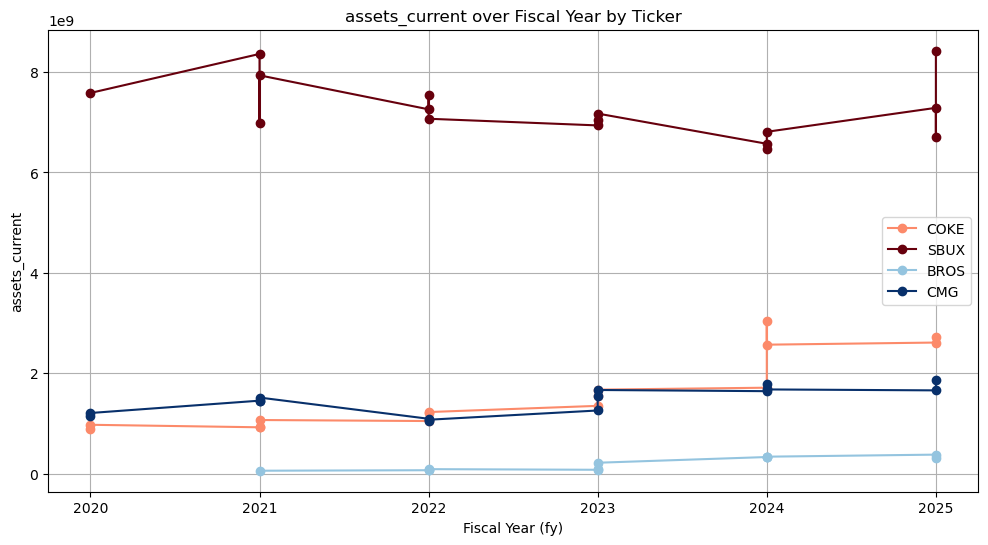

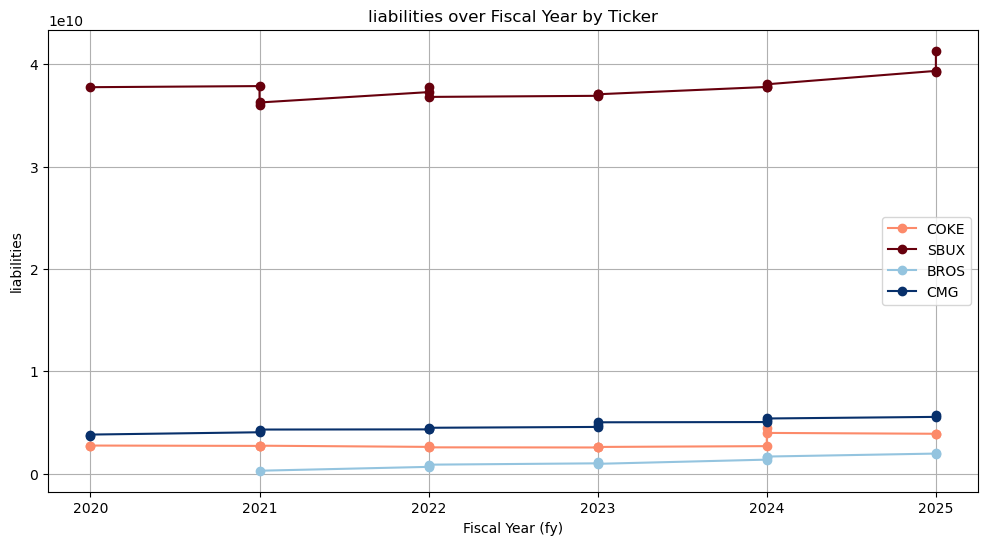

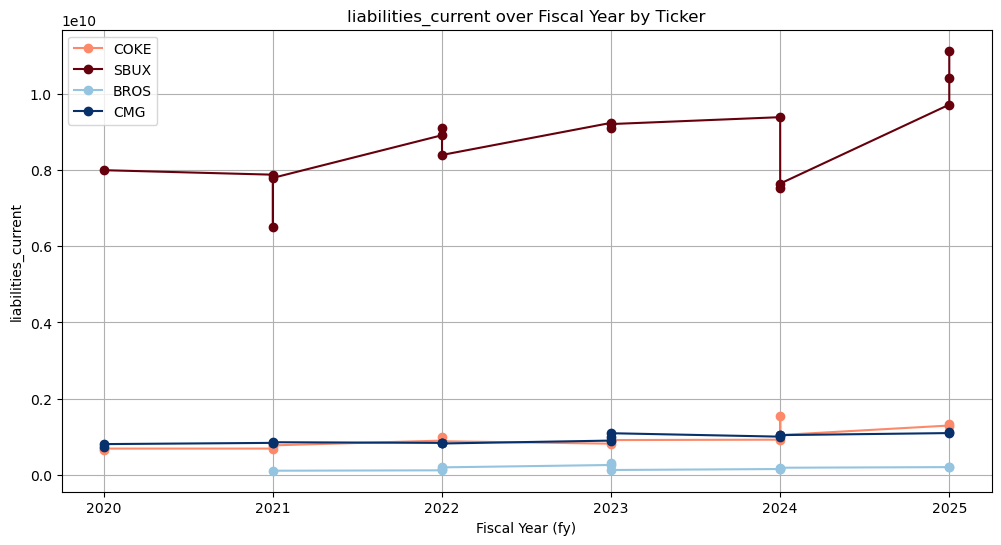

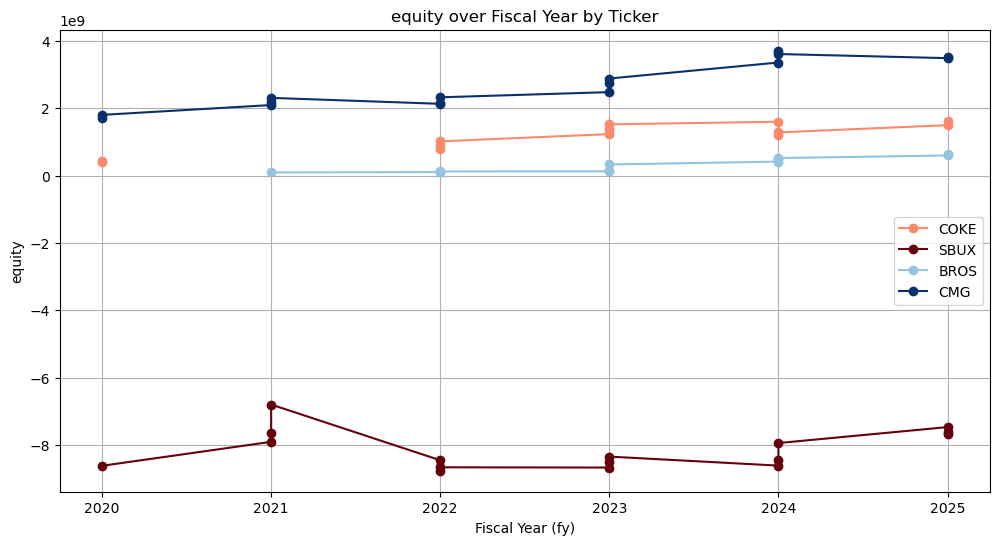

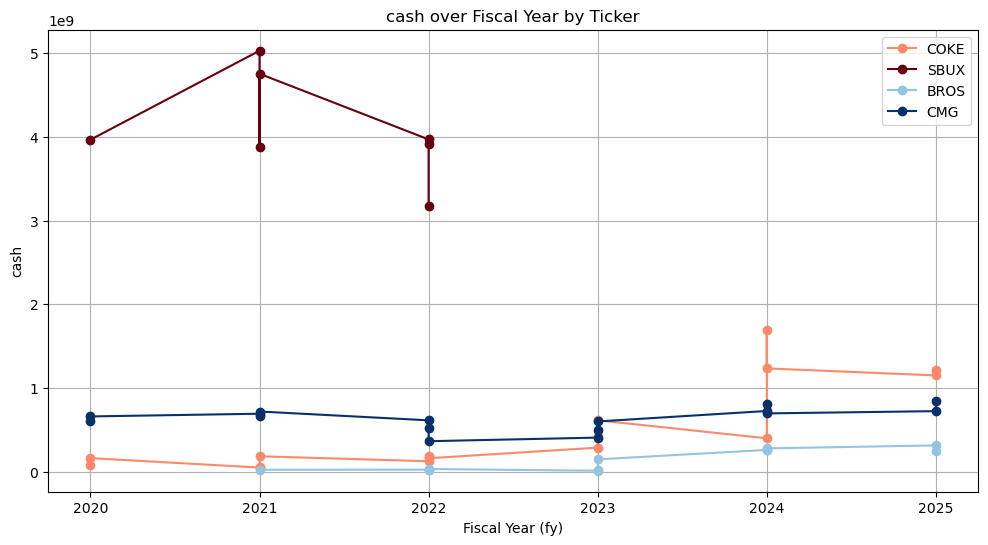

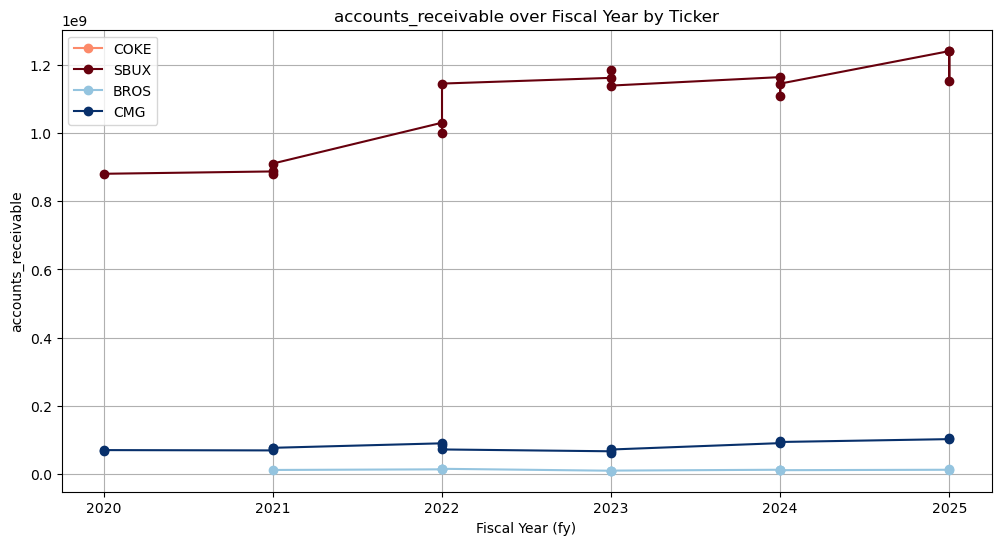

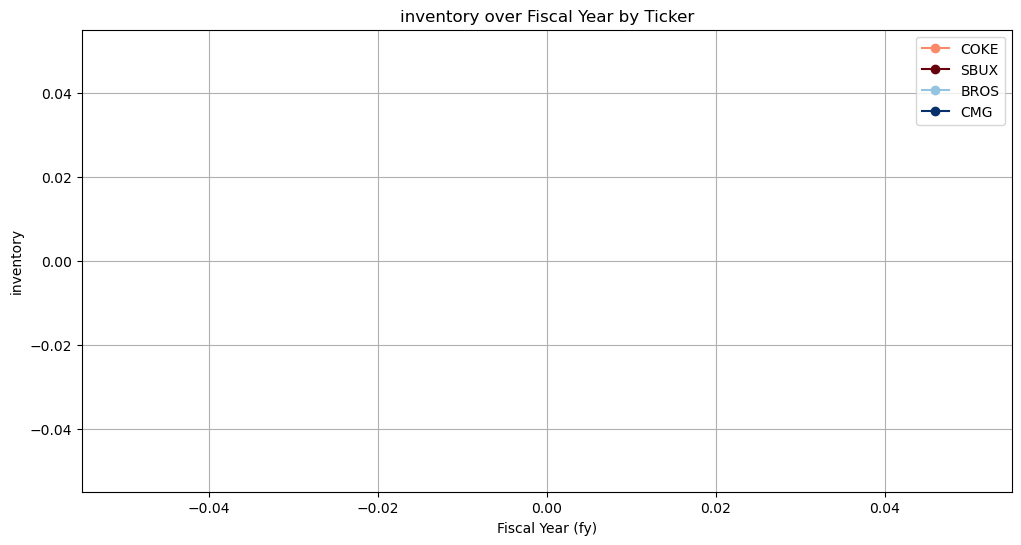

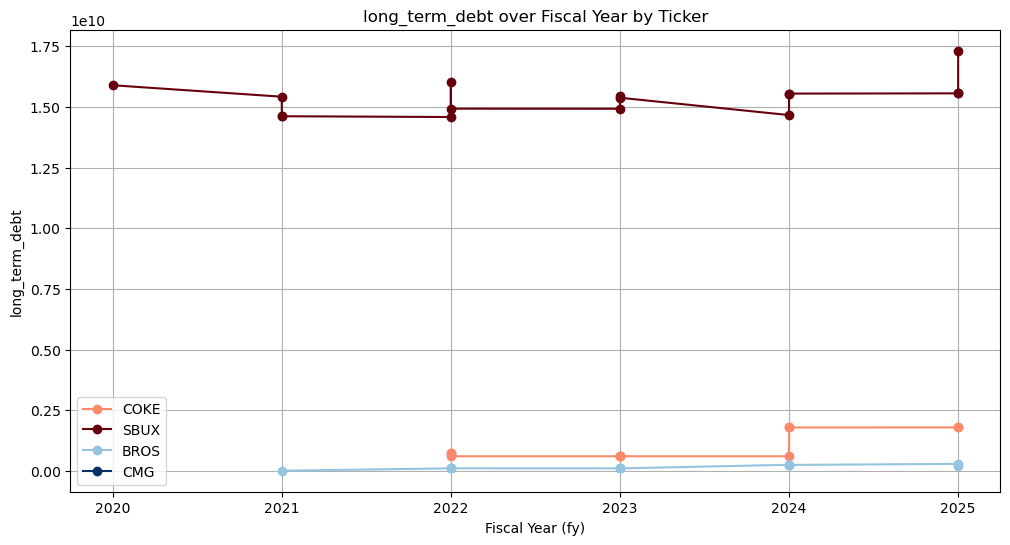

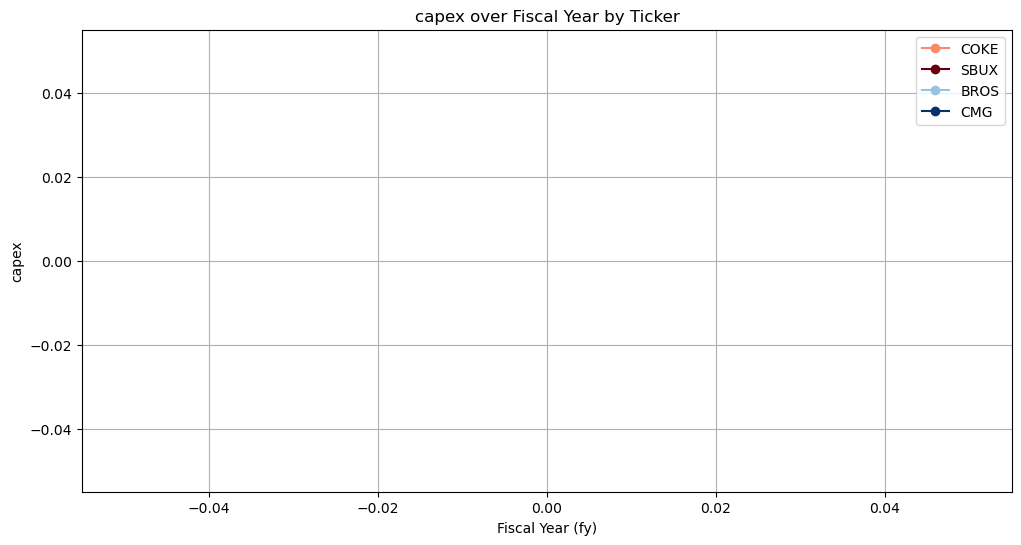

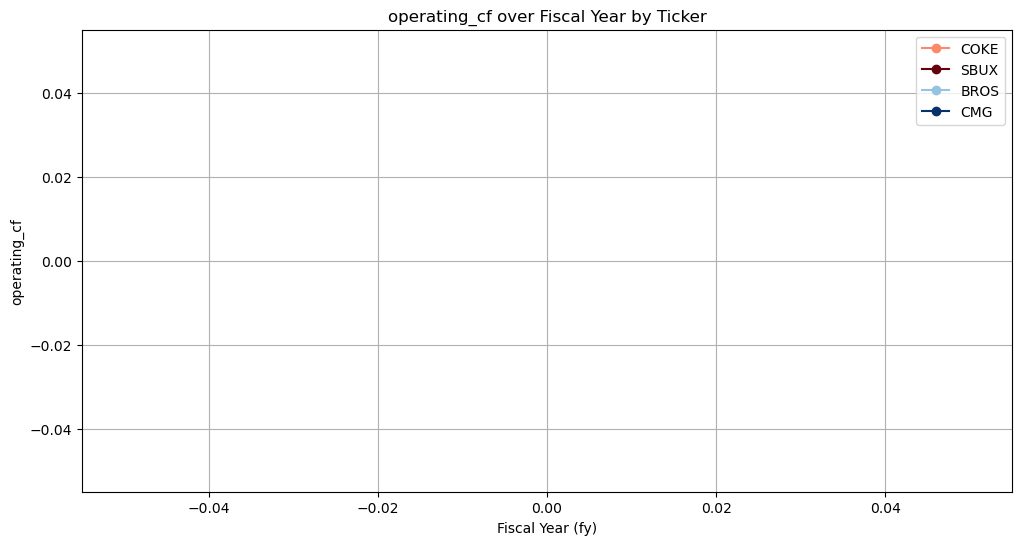

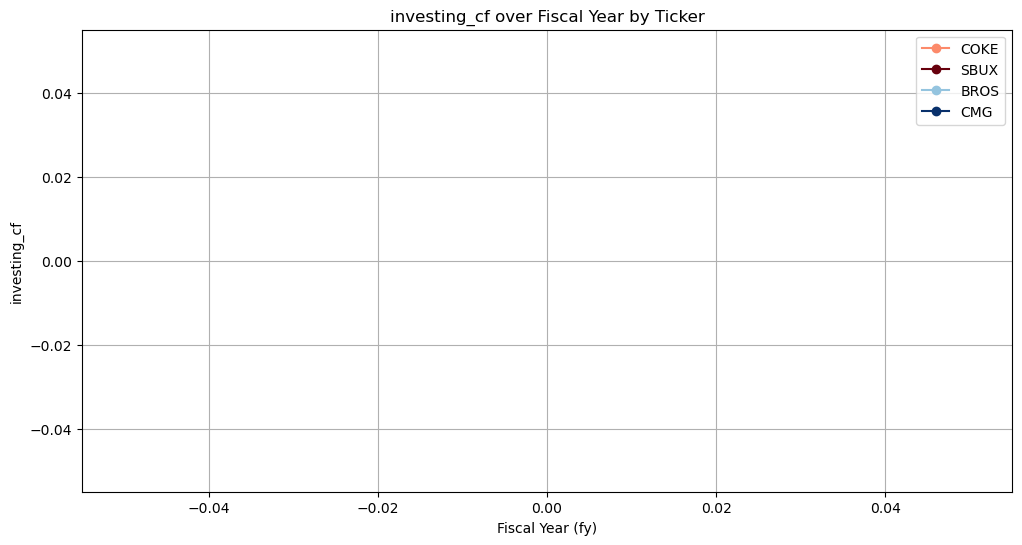

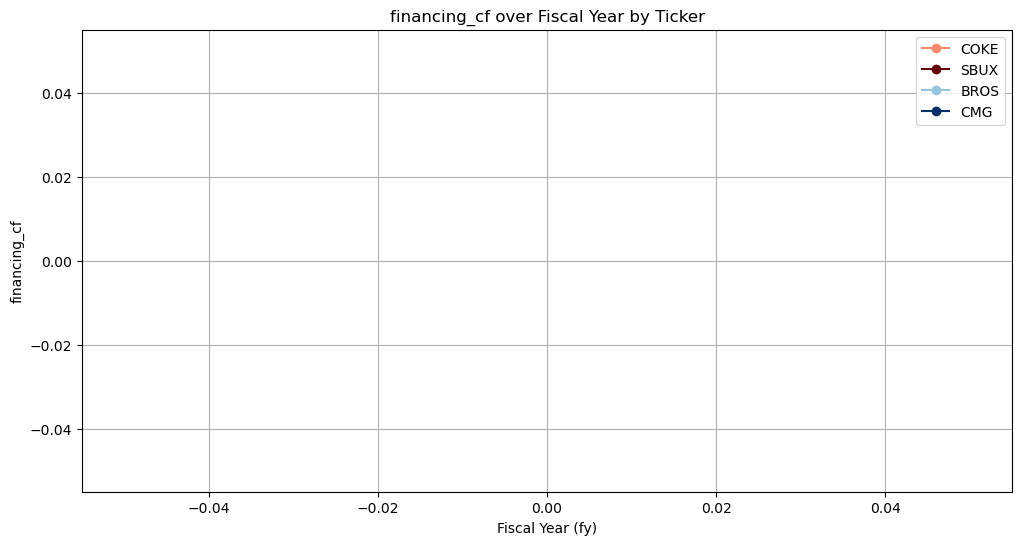

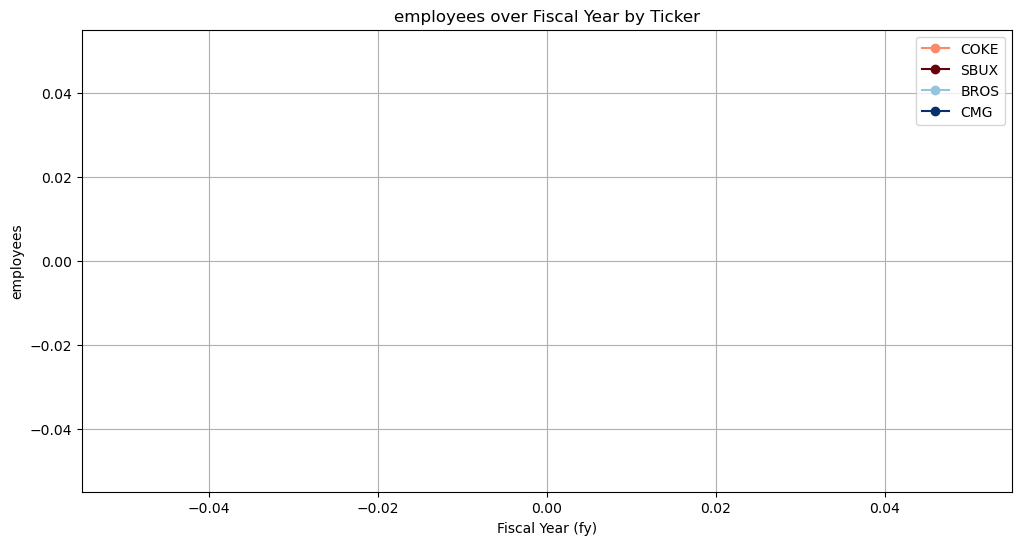

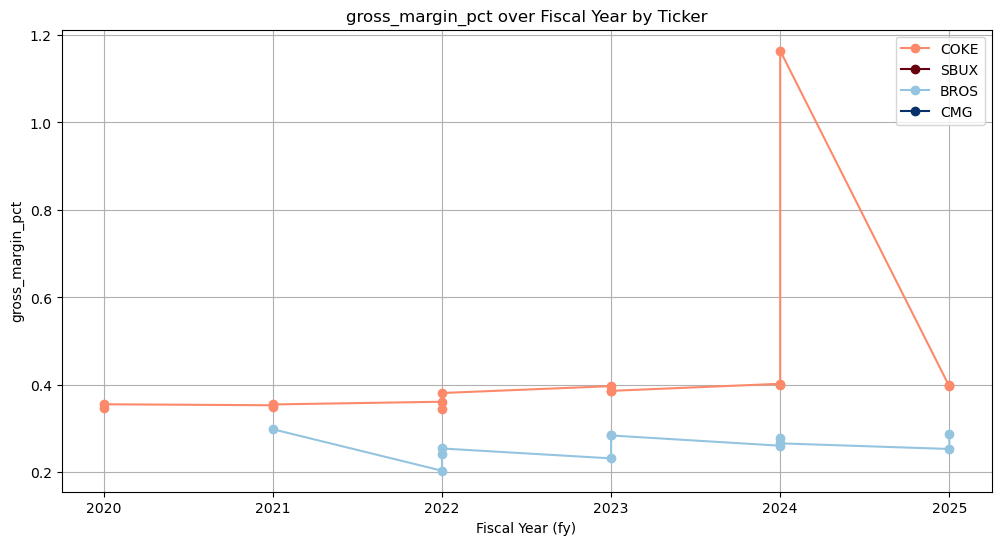

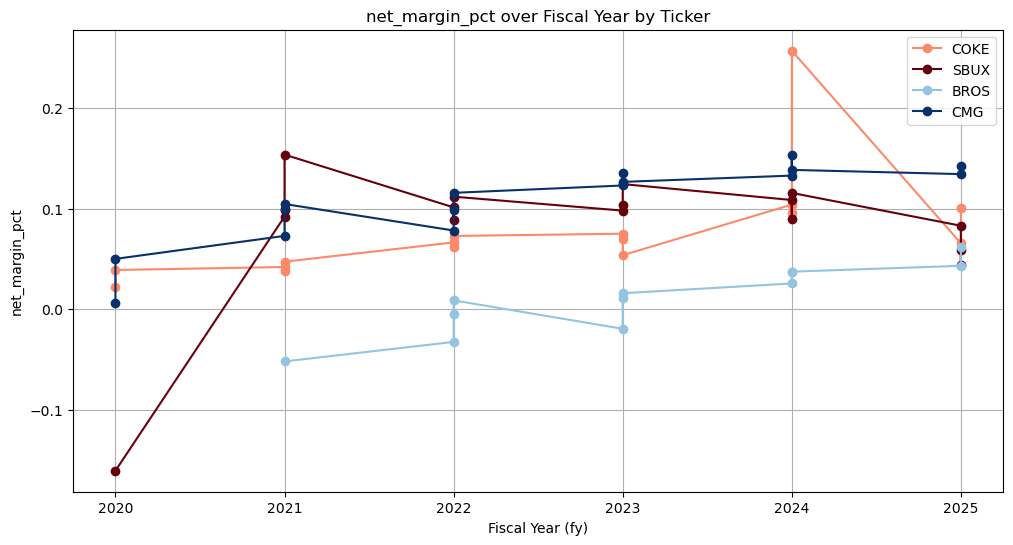

In [6]:
# Columns to plot (skip 'fy', 'ticker', 'boycotted')
cols_to_plot = [col for col in merged_df.columns if col not in ['fy', 'fp', 'ticker', 'boycotted']]

for col in cols_to_plot:
    plt.figure(figsize=(12, 6))
    
    # Separate tickers by boycott status
    boycotted_tickers = merged_df[merged_df['boycotted'] == 1]['ticker'].unique()
    non_boycotted_tickers = merged_df[merged_df['boycotted'] == 0]['ticker'].unique()
    
    # Red gradient for boycotted tickers
    reds = plt.cm.Reds(np.linspace(0.4, 1, len(boycotted_tickers)))
    for color, ticker in zip(reds, boycotted_tickers):
        df_ticker = merged_df[merged_df['ticker'] == ticker]
        plt.plot(df_ticker['fy'], df_ticker[col], marker='o', color=color, label=ticker)
    
    # Blue gradient for non-boycotted tickers
    blues = plt.cm.Blues(np.linspace(0.4, 1, len(non_boycotted_tickers)))
    for color, ticker in zip(blues, non_boycotted_tickers):
        df_ticker = merged_df[merged_df['ticker'] == ticker]
        plt.plot(df_ticker['fy'], df_ticker[col], marker='o', color=color, label=ticker)
    
    plt.xlabel('Fiscal Year (fy)')
    plt.ylabel(col)
    plt.title(f'{col} over Fiscal Year by Ticker')
    plt.legend()
    plt.grid(True)
    plt.show()



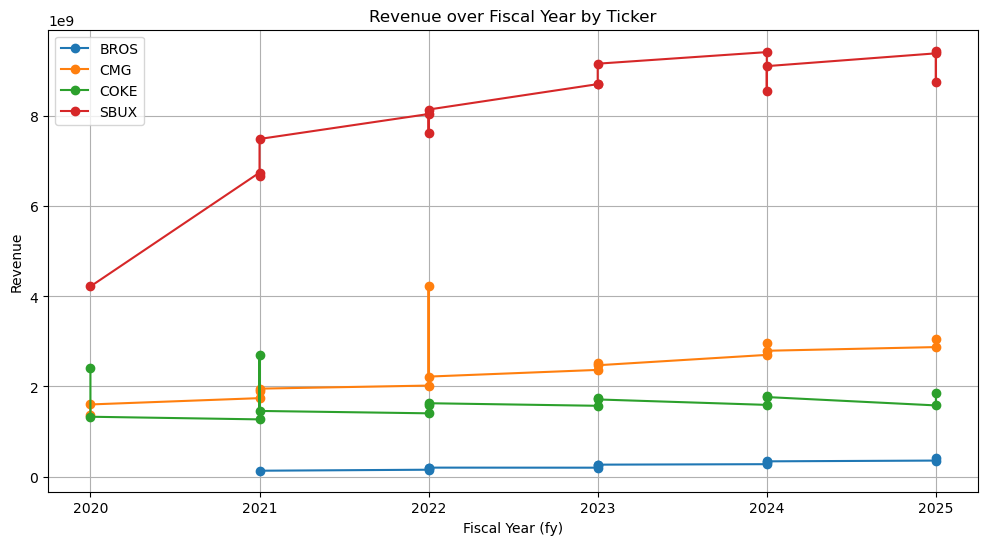

In [7]:

plt.figure(figsize=(12, 6))

# Loop over each ticker
for ticker in merged_df['ticker'].unique():
    df_ticker = merged_df[merged_df['ticker'] == ticker]
    plt.plot(df_ticker['fy'], df_ticker['revenue'], marker='o', label=ticker)

plt.xlabel('Fiscal Year (fy)')
plt.ylabel('Revenue')
plt.title('Revenue over Fiscal Year by Ticker')
plt.legend()
plt.grid(True)
plt.show()
